<a href="https://colab.research.google.com/github/AdityaTheEmpire/MLLAB/blob/main/MLEXP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Feature 1  Feature 2
0  -9.297689   6.473679
1  -9.698741   6.938967
2  -1.686653   7.793442
3  -7.097308  -5.781333
4 -10.876452   6.315437
Training Silhouette Score: 0.66
Testing Silhouette Score: 0.64


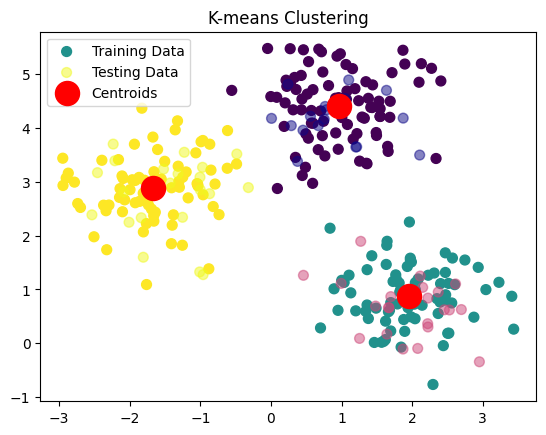

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

print(df.head())

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

train_silhouette = silhouette_score(X_train, y_train_pred)
test_silhouette = silhouette_score(X_test, y_test_pred)

print(f"Training Silhouette Score: {train_silhouette:.2f}")
print(f"Testing Silhouette Score: {test_silhouette:.2f}")


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, s=50, cmap='viridis', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, s=50, cmap='plasma', label='Testing Data', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.legend()
plt.show()